In [3]:
import maintsim
import matplotlib.pyplot as plt

plt.rc('font', **{'size':18})

## Serial three-machine line with no degradation.

In [4]:
three_machine_line = maintsim.SimulationParameters(
    process_times = [3, 1, 2],
    sim_time = 100)

scenario1 = maintsim.Scenario(three_machine_line)

scenario1.simulate()

               processing time units produced        TH MTTF MTTR  \
Machine 0                    3             32  0.323232  NaN  NaN   
Machine 1                    1             32  0.323232  NaN  NaN   
Machine 2                    2             31  0.313131  NaN  NaN   
System     bottleneck time = 3             31      0.31  NaN  NaN   

          availability  avg queue time  
Machine 0            1             NaN  
Machine 1            1             NaN  
Machine 2            1             NaN  
System               1             NaN  


In [5]:
scenario1.production_data.head()

,Machine 0 production,Machine 1 production,Machine 2 production,Machine 0 TH,Machine 1 TH,Machine 2 TH,M0 running,M1 running,M2 running,Ideal production
0,0,0,0,NaN,NaN,NaN,1,1,1,0.000000
1,0,0,0,0.000000,0.00,0.0,1,1,1,0.333333
2,0,0,0,0.000000,0.00,0.0,1,1,1,0.666667
3,1,0,0,0.333333,0.00,0.0,1,1,1,1.000000
4,1,1,0,0.250000,0.25,0.0,1,1,1,1.333333


<Figure size 864x576 with 0 Axes>

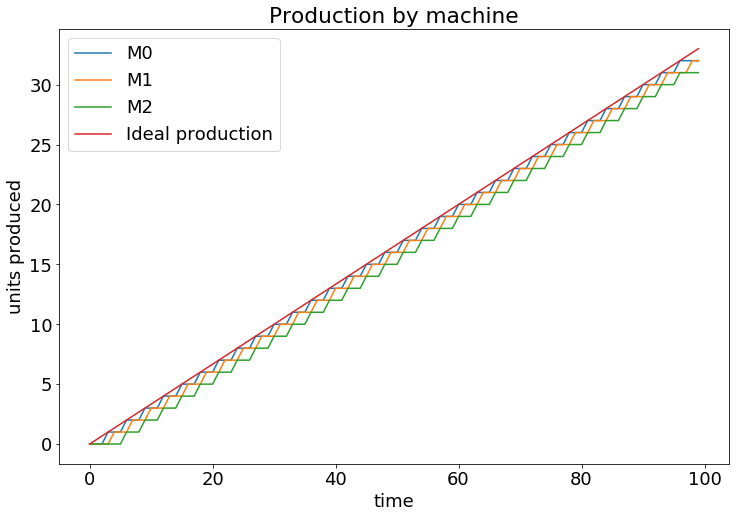

In [6]:
plt.figure(figsize=(12,8))
for m in range(scenario1.p.NUM_MACHINES):
    plt.plot(scenario1.production_data.iloc[:,m], label='M{}'.format(m))
plt.plot(scenario1.production_data['Ideal production'])
plt.title('Production by machine')
plt.xlabel('time')
plt.ylabel('units produced')
plt.legend()
plt.show()

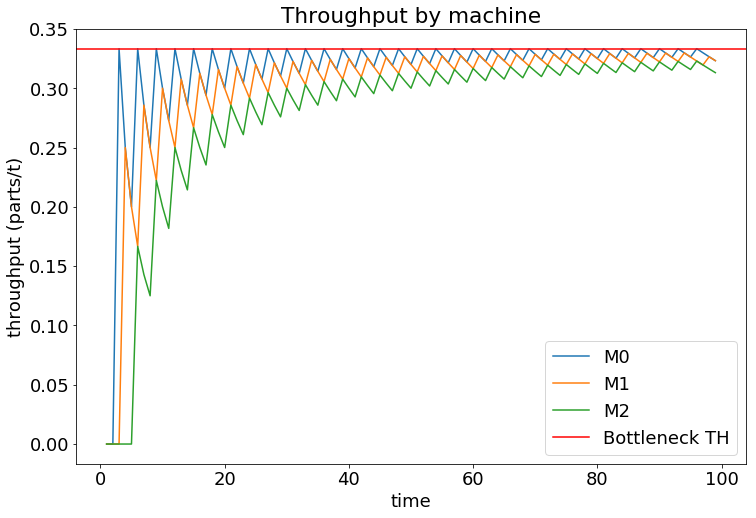

In [7]:
plt.figure(figsize=(12,8))
for m in range(scenario1.p.NUM_MACHINES):
    plt.plot(scenario1.production_data.iloc[:,3+m], label='M{}'.format(m))
plt.axhline(1/max(scenario1.p.PROCESS_TIMES), c='red', label='Bottleneck TH')
plt.title('Throughput by machine')
plt.xlabel('time')
plt.ylabel('throughput (parts/t)')
plt.legend()
plt.show()

## Five-machine line with corrective maintenance.

In [6]:
five_machine_line = maintsim.SimulationParameters(
    process_times = [4, 2, 3, 5, 2],
    sim_time = 500,

    buffer_sizes = [2]*5,
    
    degradation = [0.9]*5,
    
    maint_policy = 'CM',
    repair_dist = 'uniform',
    repair_params = [5, 15],
    queue_discipline = 'fifo',
    maint_capacity = 1,
    
    cm_cost = 100,
    
    warmup_time = 1000)

scenario2 = maintsim.Scenario(five_machine_line)

scenario2.simulate()

               processing time units produced        TH     MTTF     MTTR  \
Machine 0                    4             86  0.172345       98    14.75   
Machine 1                    2             80  0.160321  98.5833  14.3333   
Machine 2                    3             75  0.150301  108.364  15.4545   
Machine 3                    5             72  0.144289  101.667  15.1667   
Machine 4                    2             66  0.132265  94.4615  13.9231   
System     bottleneck time = 5             66     0.132  100.215  14.7255   

          availability  avg queue time  
Machine 0        2.622        3.666667  
Machine 1        2.632        8.000000  
Machine 2        2.638        4.750000  
Machine 3        2.612        3.750000  
Machine 4        2.612        7.400000  
System          2.6232        4.650000  


In [7]:
scenario2.production_data.loc[0:10,:]

,Machine 0 production,Machine 1 production,Machine 2 production,Machine 3 production,Machine 4 production,Machine 0 TH,Machine 1 TH,Machine 2 TH,Machine 3 TH,Machine 4 TH,M0 running,M1 running,M2 running,M3 running,M4 running,Ideal production
0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,0.0
1,0,0,1,0,0,0.000000,0.000000,1.000000,0.000000,0.000000,1,1,1,1,1,0.2
2,0,1,1,1,0,0.000000,0.500000,0.500000,0.500000,0.000000,1,1,1,1,1,0.4
3,0,1,1,1,0,0.000000,0.333333,0.333333,0.333333,0.000000,1,1,1,0,1,0.6
4,1,1,1,1,1,0.250000,0.250000,0.250000,0.250000,0.250000,1,1,1,0,1,0.8
5,1,1,2,1,1,0.200000,0.200000,0.400000,0.200000,0.200000,1,1,1,0,1,1.0
6,1,2,2,1,1,0.166667,0.333333,0.333333,0.166667,0.166667,1,1,1,0,1,1.2
7,1,2,2,1,1,0.142857,0.285714,0.285714,0.142857,0.142857,1,1,1,0,1,1.4
8,2,2,2,1,1,0.250000,0.250000,0.250000,0.125000,0.125000,1,1,1,0,1,1.6
9,2,2,2,1,1,0.222222,0.222222,0.222222,0.111111,0.111111,1,1,1,0,1,1.8


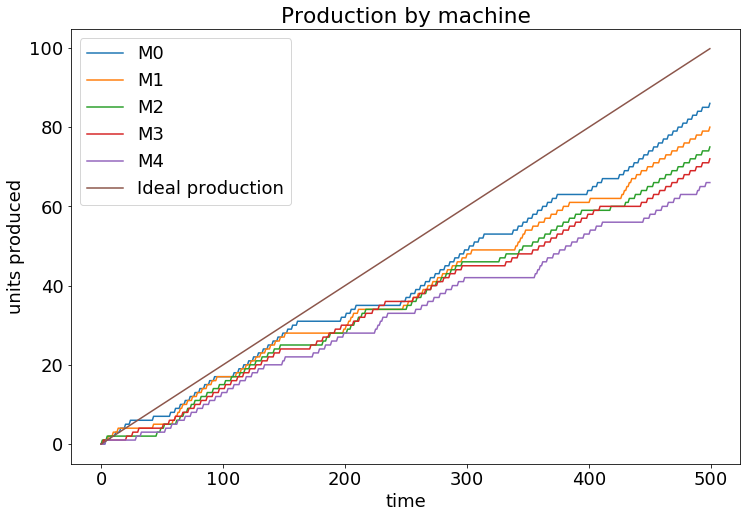

In [8]:
plt.figure(figsize=(12,8))
for m in range(scenario2.p.NUM_MACHINES):
    plt.plot(scenario2.production_data.iloc[1000:,m], label='M{}'.format(m))
plt.plot(scenario2.production_data['Ideal production'][1000:])
plt.title('Production by machine')
plt.xlabel('time')
plt.ylabel('units produced')
plt.legend()
plt.show()

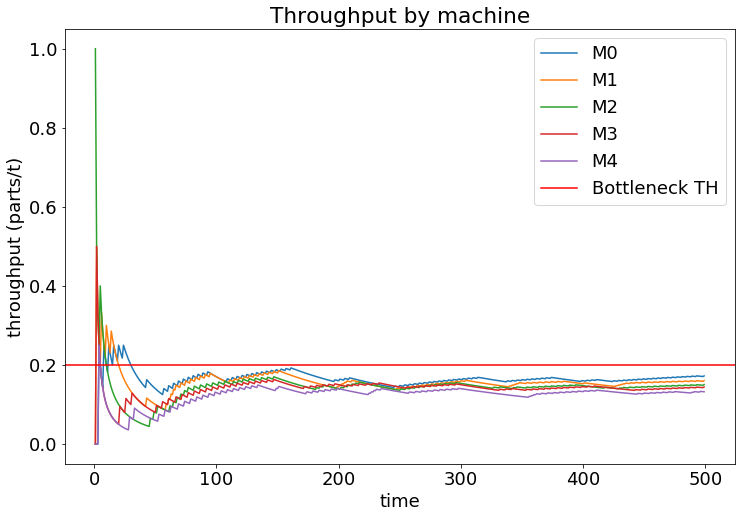

In [9]:
plt.figure(figsize=(12,8))
for m in range(scenario2.p.NUM_MACHINES):
    plt.plot(scenario2.production_data.iloc[1000:,5+m], label='M{}'.format(m))
plt.axhline(1/max(scenario2.p.PROCESS_TIMES), c='red', label='Bottleneck TH')
plt.title('Throughput by machine')
plt.xlabel('time')
plt.ylabel('throughput (parts/t)')
plt.legend()
plt.show()

In [10]:
scenario2.maintenance_data[scenario2.maintenance_data['time'] >= 0]

,time,machine,type,activity,TTF/TTR
120,3.0,3.0,CM,failure,125.0
121,3.0,3.0,CM,repair start,0.0
122,4.0,4.0,CM,failure,70.0
123,12.0,2.0,CM,failure,88.0
124,16.0,3.0,CM,repair end,13.0
125,16.0,4.0,CM,repair start,12.0
126,27.0,4.0,CM,repair end,11.0
127,27.0,2.0,CM,repair start,15.0
128,43.0,2.0,CM,repair end,16.0
129,44.0,1.0,CM,failure,69.0


In [11]:
scenario2.iterate_simulation(10, verbose=True)

       average cost
PM         0.000000
CM      2030.000000
LP         0.000000
Total   2030.000000
SE        37.549967


## Fiive-machine line with condition-based maintenance.

In [12]:
five_machine_line_cbm = maintsim.SimulationParameters(
    process_times = [4, 2, 3, 5, 2],
    sim_time = 500,   
    sim_title = 'More Complex Test Case',

    buffer_sizes = [2]*5,
    
    degradation = [0.9]*5,
    
    maint_policy = 'CBM',
    repair_dist = 'uniform',
    repair_params = [5, 15],
    queue_discipline = 'fifo',
    maint_capacity = 1,
    
    cm_cost = 100,
    
    warmup_time = 1000)

scenario3 = maintsim.Scenario(five_machine_line_cbm, 
                              thresholds=[8, 7, 7, 8, 6])

scenario3.simulate()

Interrupt: Interrupt(None)

In [13]:
scenario3.maintenance_data

,time,machine,type,activity,TTF/TTR
0,-951.0,2.0,CBM,scheduled,49.0
1,-951.0,2.0,CBM,repair start,0.0
2,-941.0,3.0,CBM,scheduled,59.0
3,-937.0,2.0,CBM,repair end,14.0
4,-937.0,3.0,CBM,repair start,4.0
5,-924.0,3.0,CBM,repair end,13.0
6,-919.0,0.0,CBM,scheduled,81.0
7,-919.0,0.0,CBM,repair start,0.0
8,-914.0,0.0,CBM,repair end,5.0
9,-907.0,1.0,CBM,scheduled,93.0
